In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import (train_test_split,
                                    cross_val_score)

## MNIST handwritten digit dataset

In [2]:
data = load_digits(return_X_y=True)

images = data[0]
target = data[1]

data = pd.DataFrame(images)
data['target'] = target

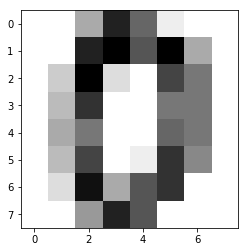

In [3]:
first_image = images[0].reshape(8,8)
plt.imshow(first_image, cmap='gray_r')

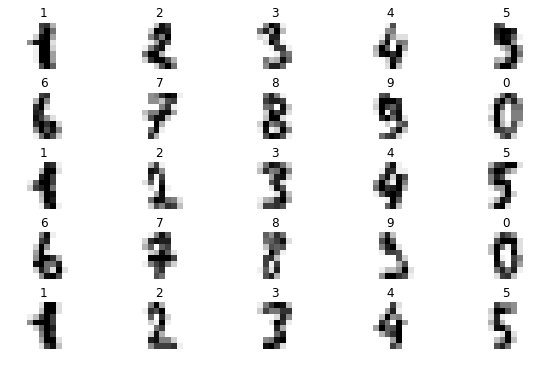

In [4]:
rows, cols = 5, 5
fig = plt.figure(figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
idx = 1
for x in range(rows):
    for y in range(cols):
        plt.subplot(rows, cols, idx)
        plt.imshow(images[idx].reshape(8,8), cmap='gray_r')
        plt.title(target[idx])
        plt.axis('off')
        idx += 1

In [5]:
target = 'target'
features = [col for col in data.columns if col != target]
X_train, X_test, y_train, y_test = train_test_split(data[features], data[[target]], test_size=0.8, random_state=1)

## K-nearest neighbors

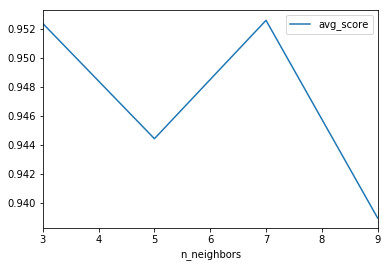

,n_neighbors,avg_score,std_score
2,7,0.952580,0.009519
0,3,0.952361,0.013472
1,5,0.944426,0.012671
3,9,0.938960,0.018920


In [6]:
knn_scores = []
for k in range(3,10,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = list(cross_val_score(knn, X_train, y_train.values.ravel(), cv=4))
    knn_scores.append({'n_neighbors':k , 'avg_score':np.mean(scores), 'std_score':np.std(scores)})
knn_results = pd.DataFrame(knn_scores).sort_values('avg_score', ascending=False)
knn_results.sort_values('n_neighbors').plot(x='n_neighbors', y='avg_score')
plt.show()
knn_results

## Neural Network

### Single layer

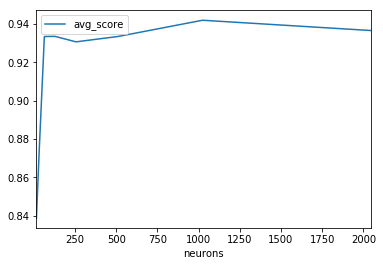

,neurons,avg_score,std_score
6,1024,0.941996,0.019865
7,2048,0.936620,0.027975
3,128,0.933583,0.026707
5,512,0.933533,0.016028
2,64,0.933494,0.017507
4,256,0.930716,0.016395
1,32,0.872454,0.034286
0,16,0.838783,0.027007


In [7]:
nn_scores = []
for neurons in [16, 32, 64, 128, 256, 512, 1024, 2048]:
    nn = MLPClassifier(hidden_layer_sizes=(neurons,), activation='relu', random_state=1)
    scores = list(cross_val_score(nn, X_train, y_train.values.ravel(), cv=4))
    nn_scores.append({'neurons':neurons , 'avg_score':np.mean(scores), 'std_score':np.std(scores)})
nn_results = pd.DataFrame(nn_scores).sort_values('avg_score', ascending=False)
nn_results.sort_values('neurons').plot(x='neurons', y='avg_score')
plt.show()
nn_results

### Multiple layers and cross folds

In [17]:
nn_scores = []
for layers in range(2,5):
    for neurons in [16, 32, 64, 128, 256, 512]:
        for cv in [4, 6]:
            hidden_layers = tuple([neurons] * layers)
            nn = MLPClassifier(hidden_layer_sizes= hidden_layers, activation='relu', random_state=1)
            scores = list(cross_val_score(nn, X_train, y_train.values.ravel(), cv=cv))
            nn_scores.append({'neurons':hidden_layers, 'cv':cv, 'avg_score':np.mean(scores), 'std_score':np.std(scores)})
nn_results = pd.DataFrame(nn_scores).sort_values('avg_score', ascending=False)
nn_results

,neurons,cv,avg_score,std_score
11,"(512, 512)",6,0.950102,0.030755
23,"(512, 512, 512)",6,0.950102,0.030755
30,"(128, 128, 128, 128)",4,0.947333,0.020443
33,"(256, 256, 256, 256)",6,0.947105,0.037094
20,"(256, 256, 256)",4,0.944863,0.025590
21,"(256, 256, 256)",6,0.944816,0.030030
32,"(256, 256, 256, 256)",4,0.944734,0.026887
17,"(64, 64, 64)",6,0.942163,0.029689
10,"(512, 512)",4,0.942136,0.036157
31,"(128, 128, 128, 128)",6,0.941948,0.025376


In [23]:
nn_results.groupby('cv').max().sort_values('avg_score', ascending=False)

,neurons,avg_score,std_score
cv,,,
6,"(512, 512, 512, 512)",0.950102,0.079350
4,"(512, 512, 512, 512)",0.947333,0.053848


### Random Forest

In [34]:
rf_scores = []
for cv in [4,6,8]:
    rf = RandomForestClassifier(max_depth=max_depth, random_state=1)
    scores = list(cross_val_score(rf, X_train, y_train.values.ravel(), cv=cv))
    rf_scores.append({'cv':cv, 'avg_score':np.mean(scores), 'std_score':np.std(scores)})
rf_results = pd.DataFrame(rf_scores).sort_values('avg_score', ascending=False)
rf_results

,cv,avg_score,std_score
1,6,0.891409,0.029279
2,8,0.890091,0.054100
0,4,0.857381,0.020574
